In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filepath = '/content/drive/MyDrive/Airbnb'

In [5]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import folium
from folium.plugins import MarkerCluster


In [6]:
listing_df= pd.read_csv("/content/drive/MyDrive/Final Project/listings.csv")

In [7]:
listing_df.head(2)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6,https://www.airbnb.com/rooms/6,20240624164233,2024-06-25,city scrape,North Park Craftsmen House * Great for Families,This Beautiful Craftsmen house has all the mod...,"We have the best Neighborhood in San Diego, in...",https://a0.muscache.com/pictures/miso/Hosting-...,29,...,4.97,4.77,4.8,"STR-04545L, 631067",f,1,1,0,0,0.78
1,12447,https://www.airbnb.com/rooms/12447,20240624164233,2024-06-25,city scrape,Cozy Getaway Pacific Beach Oasis!,Your San Diego Oasis awaits!<br /><br />Privat...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,48669,...,5.00,5.00,5.0,"STR-06735L, 631362",f,2,0,2,0,0.01


In [8]:
listing_df.shape

(12346, 75)

In [9]:
columns_to_drop= ['listing_url', 'scrape_id','last_scraped','source','picture_url', 'host_url', 'host_thumbnail_url','host_picture_url', 'neighbourhood','neighbourhood_group_cleansed','bathrooms','bedrooms','calendar_updated','calendar_last_scraped' ,'license']
listing_df = listing_df.drop(columns=columns_to_drop)

In [10]:
list_new_cols = ['listings_' + col for col in listing_df.columns]
listing_df.columns = list_new_cols

In [11]:
listing_df.shape

(12346, 60)

In [12]:
listing_df.head(1)

,listings_id,listings_name,listings_description,listings_neighborhood_overview,listings_host_id,listings_host_name,listings_host_since,listings_host_location,listings_host_about,listings_host_response_time,...,listings_review_scores_checkin,listings_review_scores_communication,listings_review_scores_location,listings_review_scores_value,listings_instant_bookable,listings_calculated_host_listings_count,listings_calculated_host_listings_count_entire_homes,listings_calculated_host_listings_count_private_rooms,listings_calculated_host_listings_count_shared_rooms,listings_reviews_per_month
0,6,North Park Craftsmen House * Great for Families,This Beautiful Craftsmen house has all the mod...,"We have the best Neighborhood in San Diego, in...",29,Sara,2008-03-03,"San Diego, CA",I am a San Diego based Entrepreneur with a lov...,within an hour,...,4.99,4.97,4.77,4.8,f,1,1,0,0,0.78


In [13]:
listing_df['listings_host_since'] = pd.to_datetime(listing_df['listings_host_since'])
current_date = datetime.now()
listing_df['listings_host_active_years'] = (current_date - listing_df['listings_host_since']).dt.days / 365.0

In [14]:
listing_df.drop('listings_host_since', axis=1, inplace=True)

In [15]:
listing_df.isna().sum()

,0
listings_id,0
listings_name,0
listings_description,315
listings_neighborhood_overview,4197
listings_host_id,0
listings_host_name,0
listings_host_location,2548
listings_host_about,4618
listings_host_response_time,918
listings_host_response_rate,918


In [16]:
listing_df['listings_host_response_rate'] = listing_df['listings_host_response_rate'].str.replace('%', '').astype(float)
listing_df['listings_host_acceptance_rate'] = listing_df['listings_host_acceptance_rate'].str.replace('%', '').astype(float)


In [17]:
binary_columns = ['listings_host_is_superhost', 'listings_host_has_profile_pic',
                  'listings_host_identity_verified', 'listings_instant_bookable', 'listings_has_availability']
for col_name in binary_columns:
    listing_df[col_name] = listing_df[col_name].apply(lambda x: 1 if x == 't' else 0)


In [18]:
listing_df.head(1)

,listings_id,listings_name,listings_description,listings_neighborhood_overview,listings_host_id,listings_host_name,listings_host_location,listings_host_about,listings_host_response_time,listings_host_response_rate,...,listings_review_scores_communication,listings_review_scores_location,listings_review_scores_value,listings_instant_bookable,listings_calculated_host_listings_count,listings_calculated_host_listings_count_entire_homes,listings_calculated_host_listings_count_private_rooms,listings_calculated_host_listings_count_shared_rooms,listings_reviews_per_month,listings_host_active_years
0,6,North Park Craftsmen House * Great for Families,This Beautiful Craftsmen house has all the mod...,"We have the best Neighborhood in San Diego, in...",29,Sara,"San Diego, CA",I am a San Diego based Entrepreneur with a lov...,within an hour,100.0,...,4.97,4.77,4.8,0,1,1,0,0,0.78,16.767123


In [19]:
listing_df['listings_bathrooms_count'] = listing_df['listings_bathrooms_text'].str.extract(r'(\d+\.?\d*)').astype(float)

def adjust_bathroom_count(row):
    if pd.isnull(row['listings_bathrooms_text']):
        return row['listings_bathrooms_count']
    if 'shared' in row['listings_bathrooms_text']:
        return row['listings_bathrooms_count'] * 0.5
    elif 'private' in row['listings_bathrooms_text']:
        return row['listings_bathrooms_count'] * 1.0
    else:
        return row['listings_bathrooms_count']

listing_df['listings_bathrooms_count'] = listing_df.apply(adjust_bathroom_count, axis=1)


In [20]:
listing_df['listings_first_review'] = pd.to_datetime(listing_df['listings_first_review'])
listing_df['listings_last_review'] = pd.to_datetime(listing_df['listings_last_review'])

In [21]:
current_date = pd.Timestamp.now()  # Use pandas Timestamp for compatibility
listing_df['listings_days_since_last_review'] = (current_date - listing_df['listings_last_review']).dt.days

In [22]:
# Calculate duration between first and last review
listing_df['listings_review_activity_duration'] = (listing_df['listings_last_review'] - listing_df['listings_first_review']).dt.days

In [23]:
listing_df.drop(['listings_first_review','listings_last_review'], axis=1, inplace=True)

In [24]:
columns_to_impute_mean = [
    'listings_host_response_rate', 'listings_host_acceptance_rate',
    'listings_review_scores_cleanliness', 'listings_review_scores_checkin',
    'listings_review_scores_communication', 'listings_review_scores_location',
    'listings_review_scores_value','listings_review_scores_rating', 'listings_review_scores_accuracy'
]
for col_name in columns_to_impute_mean:
    mean_value = listing_df[col_name].mean()
    listing_df[col_name].fillna(mean_value, inplace=True)

<ipython-input-24-3bd37c2315d7>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  listing_df[col_name].fillna(mean_value, inplace=True)


In [25]:
columns_to_impute_zero = [
    'listings_beds', 'listings_reviews_per_month','listings_bathrooms_count'
]
listing_df.fillna({col_name: 0 for col_name in columns_to_impute_zero}, inplace=True)

In [26]:
listing_df.fillna({'listings_review_activity_duration': -1, 'listings_days_since_last_review': -1}, inplace=True)

In [27]:
listing_df['listings_price'] = listing_df['listings_price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
listing_df['listings_price'] = listing_df['listings_price'].fillna(listing_df['listings_price'].mean())

In [28]:
listing_df.fillna({'listings_description': 'Unknown', 'listings_neighborhood_overview': 'Unknown', 'listings_host_location': 'Unknown', 'listings_host_about': 'Unknown', 'listings_host_response_time': 'Unknown', 'listings_host_neighbourhood':'Unknown'}, inplace=True)

In [29]:
null_counts = listing_df.isnull().sum()
null_counts_df = null_counts.reset_index()
null_counts_df.columns = ['Column', 'Null Count']
null_counts_df

,Column,Null Count
0,listings_id,0
1,listings_name,0
2,listings_description,0
3,listings_neighborhood_overview,0
4,listings_host_id,0
...,...,...
56,listings_reviews_per_month,0
57,listings_host_active_years,0
58,listings_bathrooms_count,0
59,listings_days_since_last_review,0


In [30]:
null_counts_df.to_csv("null_count.csv")

In [31]:
calendar_df=pd.read_csv("/content/drive/MyDrive/Final Project/calendar.csv")
calendar_df.head(10)

<ipython-input-31-05a3f0c37380>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  calendar_df=pd.read_csv("/content/drive/MyDrive/Final Project/calendar.csv")


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6,2024-06-25,f,$295.00,NaN,1.0,30.0
1,6,2024-06-26,f,$295.00,NaN,1.0,30.0
2,6,2024-06-27,f,$295.00,NaN,1.0,30.0
3,6,2024-06-28,f,$295.00,NaN,1.0,30.0
4,6,2024-06-29,f,$295.00,NaN,1.0,30.0
5,6,2024-06-30,f,$295.00,NaN,1.0,30.0
6,6,2024-07-01,f,$295.00,NaN,1.0,30.0
7,6,2024-07-02,f,$295.00,NaN,1.0,30.0
8,6,2024-07-03,f,$295.00,NaN,1.0,30.0
9,6,2024-07-04,f,$295.00,NaN,1.0,30.0


In [32]:
calendar_new_cols = ['calendar_' + col for col in calendar_df.columns]
calendar_df.columns = calendar_new_cols

In [33]:
calendar_df['calendar_price'] = calendar_df['calendar_price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [34]:
calendar_df.drop('calendar_adjusted_price', axis=1, inplace=True)

In [35]:
calendar_df.isna().sum()

,0
calendar_listing_id,0
calendar_date,0
calendar_available,0
calendar_price,0
calendar_minimum_nights,2
calendar_maximum_nights,2


In [36]:
calendar_df.shape

(4505763, 6)

In [37]:
calendar_df.head(2)

,calendar_listing_id,calendar_date,calendar_available,calendar_price,calendar_minimum_nights,calendar_maximum_nights
0,6,2024-06-25,f,295.0,1.0,30.0
1,6,2024-06-26,f,295.0,1.0,30.0


In [38]:
calendar_df['calendar_available'] = calendar_df['calendar_available'].apply(lambda x: 1 if x == 't' else 0)

In [39]:
calendar_df['calendar_minimum_nights'] = calendar_df['calendar_minimum_nights'].fillna(calendar_df['calendar_minimum_nights'].mean())
calendar_df['calendar_maximum_nights'] = calendar_df['calendar_maximum_nights'].fillna(calendar_df['calendar_maximum_nights'].mean())

In [40]:
reviews_df=pd.read_csv("/content/drive/MyDrive/Final Project/reviews.csv")

In [41]:
reviews_df.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,587471,60539096,2016-01-24,32436502,Collin,Wonderful. Just as advertised.
1,587471,207704960,2017-10-29,92155621,Justyn,This is an amazing house in OB with beautiful ...


In [42]:
reviews_df.shape

(792273, 6)

In [43]:
review_new_cols = ['reviews_' + col for col in reviews_df.columns]
reviews_df.columns = review_new_cols

In [44]:
reviews_df.isna().sum()

,0
reviews_listing_id,0
reviews_id,0
reviews_date,0
reviews_reviewer_id,0
reviews_reviewer_name,1
reviews_comments,197


In [45]:
reviews_df.fillna({'reviews_comments': 'Unknown', 'reviews_reviewer_name': 'Unknown'}, inplace=True)

In [46]:
reviews_df.head(2)

,reviews_listing_id,reviews_id,reviews_date,reviews_reviewer_id,reviews_reviewer_name,reviews_comments
0,587471,60539096,2016-01-24,32436502,Collin,Wonderful. Just as advertised.
1,587471,207704960,2017-10-29,92155621,Justyn,This is an amazing house in OB with beautiful ...


In [47]:
calendar_df.rename(columns={'calendar_listing_id': 'listings_id'}, inplace=True)
reviews_df.rename(columns={'reviews_listing_id': 'listings_id'}, inplace=True)


In [48]:
listing_calendar_df = pd.merge(calendar_df, listing_df, on='listings_id', how='inner')


In [49]:
listing_calendar_df.shape

(4505763, 66)

In [50]:
listing_calendar_df.drop('listings_price', axis=1, inplace=True)

In [51]:
listing_calendar_df.isna().sum()

,0
listings_id,0
calendar_date,0
calendar_available,0
calendar_price,0
calendar_minimum_nights,0
...,...
listings_reviews_per_month,0
listings_host_active_years,0
listings_bathrooms_count,0
listings_days_since_last_review,0


In [52]:
duplicates = listing_calendar_df.duplicated()
listing_calendar_df[duplicates]

,listings_id,calendar_date,calendar_available,calendar_price,calendar_minimum_nights,calendar_maximum_nights,listings_name,listings_description,listings_neighborhood_overview,listings_host_id,...,listings_instant_bookable,listings_calculated_host_listings_count,listings_calculated_host_listings_count_entire_homes,listings_calculated_host_listings_count_private_rooms,listings_calculated_host_listings_count_shared_rooms,listings_reviews_per_month,listings_host_active_years,listings_bathrooms_count,listings_days_since_last_review,listings_review_activity_duration


In [53]:
listing_calendar_df.shape

(4505763, 65)

In [54]:
listing_calendar_df.head(2)

,listings_id,calendar_date,calendar_available,calendar_price,calendar_minimum_nights,calendar_maximum_nights,listings_name,listings_description,listings_neighborhood_overview,listings_host_id,...,listings_instant_bookable,listings_calculated_host_listings_count,listings_calculated_host_listings_count_entire_homes,listings_calculated_host_listings_count_private_rooms,listings_calculated_host_listings_count_shared_rooms,listings_reviews_per_month,listings_host_active_years,listings_bathrooms_count,listings_days_since_last_review,listings_review_activity_duration
0,6,2024-06-25,0,295.0,1.0,30.0,North Park Craftsmen House * Great for Families,This Beautiful Craftsmen house has all the mod...,"We have the best Neighborhood in San Diego, in...",29,...,0,1,1,0,0,0.78,16.767123,2.0,1908.0,4101.0
1,6,2024-06-26,0,295.0,1.0,30.0,North Park Craftsmen House * Great for Families,This Beautiful Craftsmen house has all the mod...,"We have the best Neighborhood in San Diego, in...",29,...,0,1,1,0,0,0.78,16.767123,2.0,1908.0,4101.0


In [55]:
listing_reviews_df = pd.merge(listing_df, reviews_df, on='listings_id', how='inner')


In [56]:
listing_reviews_df.shape

(792273, 66)

In [57]:
listing_reviews_df.drop('listings_price', axis=1, inplace=True)

In [58]:
duplicates = listing_reviews_df.duplicated()
listing_reviews_df[duplicates]

,listings_id,listings_name,listings_description,listings_neighborhood_overview,listings_host_id,listings_host_name,listings_host_location,listings_host_about,listings_host_response_time,listings_host_response_rate,...,listings_reviews_per_month,listings_host_active_years,listings_bathrooms_count,listings_days_since_last_review,listings_review_activity_duration,reviews_id,reviews_date,reviews_reviewer_id,reviews_reviewer_name,reviews_comments


In [59]:
listing_reviews_df.head(2)

,listings_id,listings_name,listings_description,listings_neighborhood_overview,listings_host_id,listings_host_name,listings_host_location,listings_host_about,listings_host_response_time,listings_host_response_rate,...,listings_reviews_per_month,listings_host_active_years,listings_bathrooms_count,listings_days_since_last_review,listings_review_activity_duration,reviews_id,reviews_date,reviews_reviewer_id,reviews_reviewer_name,reviews_comments
0,6,North Park Craftsmen House * Great for Families,This Beautiful Craftsmen house has all the mod...,"We have the best Neighborhood in San Diego, in...",29,Sara,"San Diego, CA",I am a San Diego based Entrepreneur with a lov...,within an hour,100.0,...,0.78,16.767123,2.0,1908.0,4101.0,8,2008-06-22,415,Terrence,Sara is an awesome hostess. She was very cons...
1,6,North Park Craftsmen House * Great for Families,This Beautiful Craftsmen house has all the mod...,"We have the best Neighborhood in San Diego, in...",29,Sara,"San Diego, CA",I am a San Diego based Entrepreneur with a lov...,within an hour,100.0,...,0.78,16.767123,2.0,1908.0,4101.0,4383,2009-06-22,3762,Christine,My stay at “Craftsmen” was wonderful! Sara wa...


In [60]:
listing_reviews_df.to_csv("listing_review.csv", index=False)

In [61]:
listing_calendar_df.to_csv("listing_calendar.csv", index=False)

# **ANALYSIS QUESTIONS**


# **Are certain keywords in the listing description associated with higher review scores or popularity?**

In [62]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

Descriptive Statistics:
count    792273.000000
mean          4.838950
std           0.135223
min           1.000000
25%           4.780000
50%           4.870000
75%           4.930000
max           5.000000
Name: listings_review_scores_rating, dtype: float64


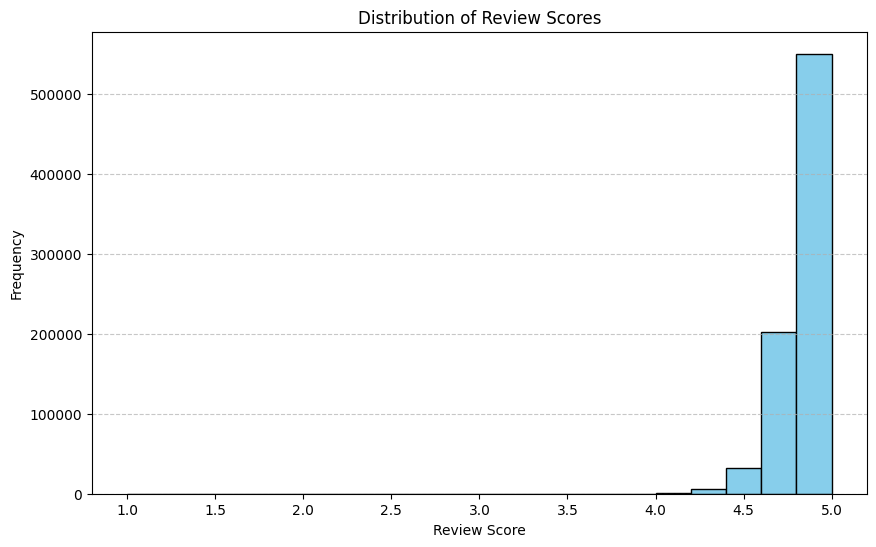

In [63]:
import matplotlib.pyplot as plt

review_scores = listing_reviews_df['listings_review_scores_rating'].dropna()

# Summary statistics
print("Descriptive Statistics:")
print(review_scores.describe())

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(review_scores, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [64]:
# Calculate percentiles
high_score_threshold = review_scores.quantile(0.90)
low_score_threshold = review_scores.quantile(0.10)

print(f"High Score Threshold (90th Percentile): {high_score_threshold}")
print(f"Low Score Threshold (10th Percentile): {low_score_threshold}")

High Score Threshold (90th Percentile): 4.97
Low Score Threshold (10th Percentile): 4.67


In [65]:
high_rated = listing_reviews_df[listing_reviews_df['listings_review_scores_rating'] >= high_score_threshold]
low_rated = listing_reviews_df[listing_reviews_df['listings_review_scores_rating'] <= low_score_threshold]

In [66]:
# Combine listing descriptions for each group
high_rated_text = ' '.join(high_rated['listings_description'].dropna().tolist())
low_rated_text = ' '.join(low_rated['listings_description'].dropna().tolist())

In [67]:
vectorizer = CountVectorizer(stop_words='english', max_features=50)
high_rated_matrix = vectorizer.fit_transform([high_rated_text])
low_rated_matrix = vectorizer.fit_transform([low_rated_text])

In [68]:
high_rated_keywords = pd.DataFrame({'Keyword': vectorizer.get_feature_names_out(),
                                    'Frequency': high_rated_matrix.toarray()[0]})
low_rated_keywords = pd.DataFrame({'Keyword': vectorizer.get_feature_names_out(),
                                   'Frequency': low_rated_matrix.toarray()[0]})


In [69]:
high_score_threshold = 4.97
low_score_threshold = 4.67

In [70]:
high_rated = listing_reviews_df[listing_reviews_df['listings_review_scores_rating'] >= high_score_threshold]
low_rated = listing_reviews_df[listing_reviews_df['listings_review_scores_rating'] <= low_score_threshold]


In [71]:
high_rated_text = ' '.join(high_rated['listings_description'].dropna().tolist())
low_rated_text = ' '.join(low_rated['listings_description'].dropna().tolist())

In [72]:
# Calculate total number of listings in each group
total_high = len(high_rated)
total_low = len(low_rated)

In [73]:
# Calculate relative frequencies
high_rated_keywords['Relative_Frequency_High'] = high_rated_keywords['Frequency'] / total_high
low_rated_keywords['Relative_Frequency_Low'] = low_rated_keywords['Frequency'] / total_low

In [74]:
# Merge and calculate relative frequency differences
keyword_comparison = pd.merge(
    high_rated_keywords,
    low_rated_keywords,
    on='Keyword',
    suffixes=('_High', '_Low')
)

In [75]:
keyword_comparison['Relative_Difference'] = (
    keyword_comparison['Relative_Frequency_High'] - keyword_comparison['Relative_Frequency_Low']
)

In [76]:
# Sort by relative frequency difference
keyword_comparison = keyword_comparison.sort_values(by='Relative_Difference', ascending=False)


In [77]:
# Display the top 10 keywords
print(keyword_comparison.head(10))

# Generate a word cloud from relative differences
keyword_frequencies = dict(zip(keyword_comparison['Keyword'], keyword_comparison['Relative_Difference']))


     Keyword  Frequency_High  Relative_Frequency_High  Frequency_Low  \
5   bathroom           78637                 0.790926          14504   
12     close           66518                 0.669034          13733   
40     space           67687                 0.680791          15274   
18     great           55743                 0.560659          12345   
36      room           56205                 0.565306          21490   
19     heart           33440                 0.336337          12020   
38     shops           32130                 0.323161          13540   
32   parking           40867                 0.411038          20803   
15     enjoy           33479                 0.336730          15118   
30   pacific           26446                 0.265992          11783   

    Relative_Frequency_Low  Relative_Difference  
5                 0.176555             0.614371  
12                0.167170             0.501864  
40                0.185928             0.494863  
18     

In [78]:
# Word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(keyword_frequencies)


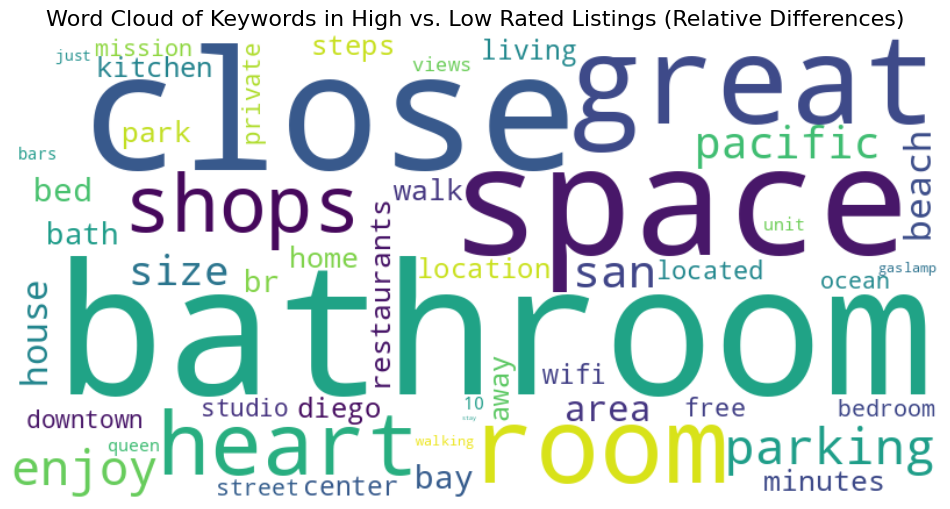

In [79]:
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords in High vs. Low Rated Listings (Relative Differences)', fontsize=16)
plt.show()

"bathroom," "close," "space," "room," and "great" are the largest words, meaning these keywords have the largest relative differences in favor of high-rated listings.
These likely emphasize cleanliness, proximity, spaciousness, and overall positive impressions in descriptions.

Words like "shops," "heart," "kitchen," "parking," and "home" also play significant roles.
They might highlight guest priorities like convenience, accessibility, and amenities.

The size of the words reflects their relative importance, offering intuitive insights into what distinguishes high-rated listings

Hosts can improve their listings by emphasizing features like "close" and "heart" to highlight accessible locations.
Amenities: Mention "bathroom," "parking," "kitchen," and "shops."
Space: Highlight "spacious" living areas or rooms.

# **How do different neighborhoods influence listing prices and availability?**

In [80]:
listing_calendar_df['calendar_price'] = listing_calendar_df['calendar_price'].replace('[\$,]', '', regex=True).astype(float)

In [81]:
listing_calendar_df = listing_calendar_df.dropna(subset=['listings_neighbourhood_cleansed', 'calendar_price', 'calendar_available', 'calendar_minimum_nights', 'calendar_maximum_nights'])

In [82]:
# Group by neighborhood to calculate statistics
neighborhood_group = listing_calendar_df.groupby('listings_neighbourhood_cleansed').agg(
    avg_price=('calendar_price', 'mean'),
    avg_min_nights=('calendar_minimum_nights', 'mean'),
    avg_max_nights=('calendar_maximum_nights', 'mean'),
    total_listings=('listings_id', 'nunique')
).reset_index()


In [83]:
# Merge back to get latitude and longitude for neighborhoods
# Assuming the dataset has 'listings_latitude' and 'listings_longitude'
location_data = listing_calendar_df.groupby('listings_neighbourhood_cleansed')[['listings_latitude', 'listings_longitude']].mean().reset_index()
neighborhood_group = pd.merge(neighborhood_group, location_data, on='listings_neighbourhood_cleansed')



In [84]:
# Create a Folium map centered on San Diego
san_diego_map = folium.Map(location=[32.7157, -117.1611], zoom_start=12)

In [85]:
# Add neighborhoods to the map
marker_cluster = MarkerCluster().add_to(san_diego_map)
for _, row in neighborhood_group.iterrows():
    popup_text = (
        f"<b>Neighborhood:</b> {row['listings_neighbourhood_cleansed']}<br>"
        f"<b>Avg Price:</b> ${row['avg_price']:.2f}<br>"
        f"<b>Avg Min Nights:</b> {row['avg_min_nights']:.1f}<br>"
        f"<b>Avg Max Nights:</b> {row['avg_max_nights']:.1f}<br>"
        f"<b>Total Listings:</b> {row['total_listings']}"
    )
    folium.Marker(
        location=[row['listings_latitude'], row['listings_longitude']],
        popup=popup_text,
        icon=folium.Icon(color="blue", icon="info-sign")
    ).add_to(marker_cluster)

In [86]:
# Save the map to an HTML file
san_diego_map.save("san_diego_neighborhood_map.html")

In [87]:
san_diego_map

# **How do listing prices fluctuate throughout the year**

In [88]:
# Ensure calendar_price is numeric
listing_calendar_df['calendar_price'] = listing_calendar_df['calendar_price'].replace('[\$,]', '', regex=True).astype(float)

# Convert calendar_date to datetime format
listing_calendar_df['calendar_date'] = pd.to_datetime(listing_calendar_df['calendar_date'])

# Add a month column for seasonal analysis
listing_calendar_df['month'] = listing_calendar_df['calendar_date'].dt.month


In [89]:
# Aggregate data by month to calculate average price
monthly_trends = listing_calendar_df.groupby('month').agg(
    average_price=('calendar_price', 'mean')
).reset_index()


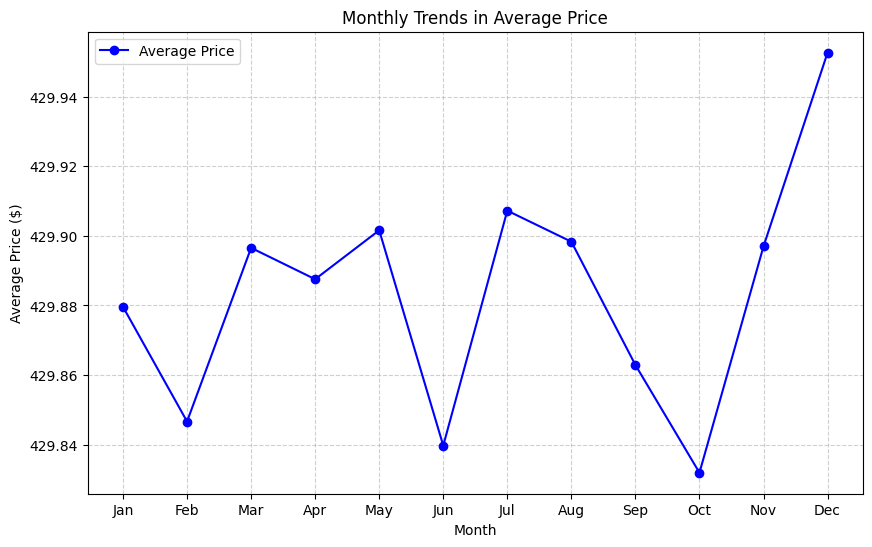

In [90]:
# Plot average price trends across months
plt.figure(figsize=(10, 6))
plt.plot(monthly_trends['month'], monthly_trends['average_price'], marker='o', label='Average Price', color='blue')
plt.title('Monthly Trends in Average Price')
plt.xlabel('Month')
plt.ylabel('Average Price ($)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


In [91]:
listing_calendar_df['weekday'] = listing_calendar_df['calendar_date'].dt.day_name()

In [92]:
weekday_trends = listing_calendar_df.groupby('weekday').agg(
    average_price=('calendar_price', 'mean')
).reset_index()

In [93]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_trends['weekday'] = pd.Categorical(weekday_trends['weekday'], categories=weekday_order, ordered=True)
weekday_trends = weekday_trends.sort_values('weekday')


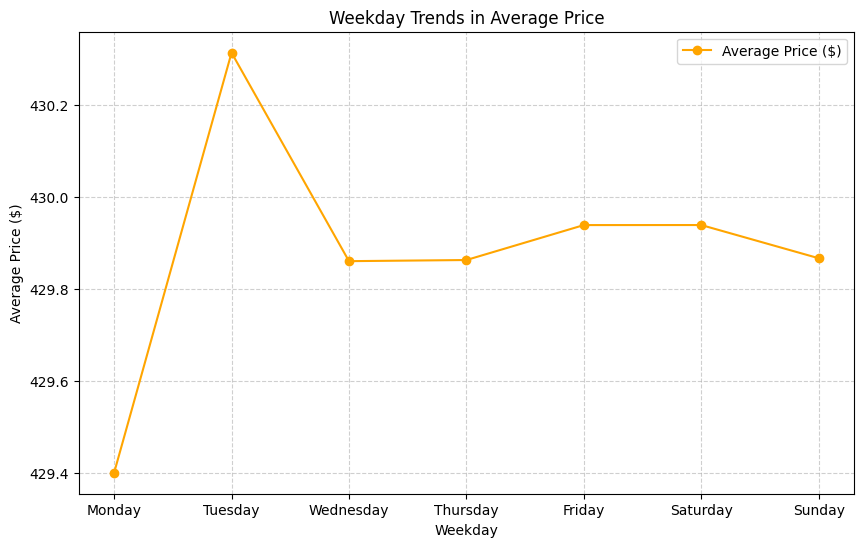

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(weekday_trends['weekday'], weekday_trends['average_price'], marker='o', label='Average Price ($)', color='orange')
plt.title('Weekday Trends in Average Price')
plt.xlabel('Weekday')
plt.ylabel('Average Price ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

Average Price Trends:

Prices are stable year-round but increase in December (holiday season).
Slight dip in June, possibly due to discounts to attract bookings.
Availability Rate Trends:

Lowest in July, indicating peak booking demand in summer.
High availability in January-February, suggesting slower booking activity.

The average price is higher on Tuesdays, which is unusual as weekends are more expensive which might be due to specific events or activities in San Diego that occur on or around Tuesdays, causing a temporary surge in demand.

# **Does a host being locally based (San Diego, CA) affect the booking rate and review scores of their listings?**

In [95]:
# Filter data for local and non-local hosts
local_hosts = listing_calendar_df[listing_calendar_df['listings_host_location'].str.contains('San Diego, CA', case=False, na=False)]
non_local_hosts = listing_calendar_df[~listing_calendar_df['listings_host_location'].str.contains('San Diego, CA', case=False, na=False)]


In [96]:
local_booking_rate = local_hosts['calendar_available'].mean()
non_local_booking_rate = non_local_hosts['calendar_available'].mean()

In [97]:
# Calculate average review scores if available in your dataset
if 'listings_review_scores_rating' in listing_calendar_df.columns:
    local_avg_review_score = local_hosts['listings_review_scores_rating'].mean()
    non_local_avg_review_score = non_local_hosts['listings_review_scores_rating'].mean()
else:
    local_avg_review_score = None
    non_local_avg_review_score = None


In [98]:
# Print results
print(f"Booking Rate - Local Hosts: {1 - local_booking_rate:.2%}")
print(f"Booking Rate - Non-Local Hosts: {1 - non_local_booking_rate:.2%}")


Booking Rate - Local Hosts: 47.60%
Booking Rate - Non-Local Hosts: 41.73%


In [99]:

if local_avg_review_score and non_local_avg_review_score:
    print(f"Average Review Score - Local Hosts: {local_avg_review_score:.2f}")
    print(f"Average Review Score - Non-Local Hosts: {non_local_avg_review_score:.2f}")


Average Review Score - Local Hosts: 4.83
Average Review Score - Non-Local Hosts: 4.78


Local Hosts (47.57%) have a slightly higher booking rate compared to Non-Local Hosts (41.88%).
This suggests that listings managed by hosts based in San Diego might be slightly more attractive to guests, potentially due to factors like local knowledge, responsiveness, or personalized service.

Both groups have high review scores, with Local Hosts (4.83) marginally outperforming Non-Local Hosts (4.79).
The small difference implies that while location might influence guest experience, non-local hosts are also delivering high-quality stays.

## **How does the presence of certain amenities or features (e.g., WiFi, kitchen, tv, pool) mentioned in reviews affect the average rating?**

In [107]:
# Extract amenities and perform analysis
def extract_amenities(amenities_str):
    if pd.isna(amenities_str):
        return []
    return [amenity.strip().lower() for amenity in amenities_str.strip('{}').replace('"', '').split(',')]

# Add a column with extracted amenities
listing_df['extracted_amenities'] = listing_df['listings_amenities'].apply(extract_amenities)

# Key amenities to analyze
key_amenities = [
    'wifi', 'kitchen',
    'air conditioning', 'heating',
    'tv', 'pool', 'gym',
]

# Function to check if an amenity is present
def has_amenity(amenities_list, amenity):
    return any(am in amenity.lower() for am in amenities_list)

# Create binary columns for each amenity
for amenity in key_amenities:
    listing_df[f'has_{amenity.replace(" ", "_")}'] = listing_df['extracted_amenities'].apply(lambda x: has_amenity(x, amenity))

# Analyze impact on review scores
amenity_impact = {}
for amenity in key_amenities:
    col_name = f'has_{amenity.replace(" ", "_")}'

    # T-test to check statistical significance
    amenity_present = listing_df[listing_df[col_name]]['listings_review_scores_rating']
    amenity_absent = listing_df[~listing_df[col_name]]['listings_review_scores_rating']

    # Perform t-test
    t_stat, p_value = ttest_ind(amenity_present, amenity_absent)

    amenity_impact[amenity] = {
        'present_avg_rating': amenity_present.mean(),
        'absent_avg_rating': amenity_absent.mean(),
        'rating_difference': amenity_present.mean() - amenity_absent.mean(),
        'p_value': p_value
    }

# Convert to DataFrame for easier visualization
impact_df = pd.DataFrame.from_dict(amenity_impact, orient='index')
impact_df = impact_df.sort_values('rating_difference', ascending=False)



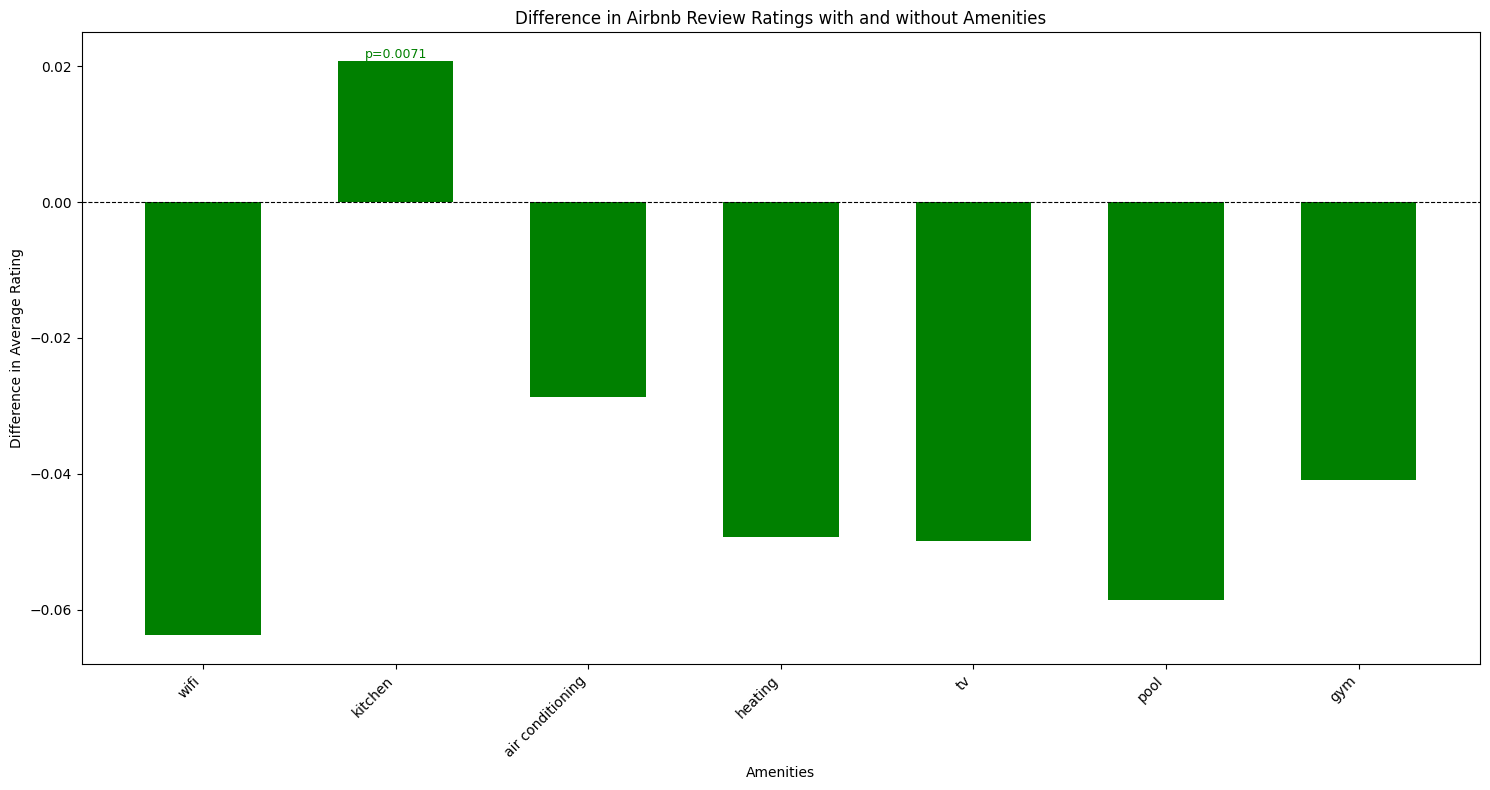


Detailed Amenity Impact Analysis:

Wifi:
  Average Rating (With Amenity): 4.81
  Average Rating (Without Amenity): 4.87
  Rating Difference: -0.06
  Statistical Significance (p-value): 0.0000

Kitchen:
  Average Rating (With Amenity): 4.82
  Average Rating (Without Amenity): 4.80
  Rating Difference: 0.02
  Statistical Significance (p-value): 0.0071

Air conditioning:
  Average Rating (With Amenity): 4.80
  Average Rating (Without Amenity): 4.83
  Rating Difference: -0.03
  Statistical Significance (p-value): 0.0000

Heating:
  Average Rating (With Amenity): 4.79
  Average Rating (Without Amenity): 4.84
  Rating Difference: -0.05
  Statistical Significance (p-value): 0.0000

Tv:
  Average Rating (With Amenity): 4.79
  Average Rating (Without Amenity): 4.84
  Rating Difference: -0.05
  Statistical Significance (p-value): 0.0000

Pool:
  Average Rating (With Amenity): 4.76
  Average Rating (Without Amenity): 4.82
  Rating Difference: -0.06
  Statistical Significance (p-value): 0.0000

G

In [108]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data for visualization
amenities = list(amenity_impact.keys())
present_ratings = [amenity_impact[am]['present_avg_rating'] for am in amenities]
absent_ratings = [amenity_impact[am]['absent_avg_rating'] for am in amenities]
rating_differences = [amenity_impact[am]['rating_difference'] for am in amenities]
p_values = [amenity_impact[am]['p_value'] for am in amenities]

# Create the visualization
plt.figure(figsize=(15, 8))

# Bar plot for rating differences
bar_width = 0.6
x = np.arange(len(amenities))
bar_colors = ['green' if p < 0.05 else 'gray' for p in p_values]

plt.bar(x, rating_differences, width=bar_width, color=bar_colors)

# Add p-value annotations
for i, (diff, p) in enumerate(zip(rating_differences, p_values)):
    color = 'green' if p < 0.05 else 'red'
    plt.text(i, diff, f'p={p:.4f}', ha='center', va='bottom', color=color, fontsize=9)

# Customize the plot
plt.title('Difference in Airbnb Review Ratings with and without Amenities')
plt.xlabel('Amenities')
plt.ylabel('Difference in Average Rating')
plt.xticks(x, amenities, rotation=45, ha='right')
plt.axhline(y=0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()

# Print detailed statistical summary
print("\nDetailed Amenity Impact Analysis:")
for amenity in amenities:
    stats = amenity_impact[amenity]
    print(f"\n{amenity.capitalize()}:")
    print(f"  Average Rating (With Amenity): {stats['present_avg_rating']:.2f}")
    print(f"  Average Rating (Without Amenity): {stats['absent_avg_rating']:.2f}")
    print(f"  Rating Difference: {stats['rating_difference']:.2f}")
    print(f"  Statistical Significance (p-value): {stats['p_value']:.4f}")